# Visualize 91App data by using matplotlib

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../Orders.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#add formatted date colum
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
df.head(5)

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03


In [45]:
data = df.groupby(by='new_DateId')['Quantity'].sum().to_frame()
data

,Quantity
new_DateId,
2015-05-06,26
2015-05-07,38
2015-05-08,61
2015-05-09,87
2015-05-10,103
2015-05-11,98
2015-05-12,71
2015-05-13,83
2015-05-14,61


In [46]:
#reset_index: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
data.reset_index(level=0, inplace=True)
data.head(5)

,new_DateId,Quantity
0,2015-05-06,26
1,2015-05-07,38
2,2015-05-08,61
3,2015-05-09,87
4,2015-05-10,103


### 使用 matplotlib 進行資料視覺化
1. 資料 : 使用和第一次任務相同的整理後每日銷售量資料，只不過這邊把之前的 series 格式轉成更正式的 dataframe 格式。
2. 使用 : 在使用 matplotlib 畫圖時基本 SOP : 
        (1) 先造出用來放畫布的 figure 
        (2) 造出用來畫畫的畫布 axe 
        (3) 畫在畫布 axe 上 
        (4) 更多細節設定，像是 x, y軸 
        (5) 顯示 show 出來
3. 說明 : 
    下方 `fig, ax = plt.subplots()` 就是一次造出 (1) figure 和 (2) axe，然後透過 `plot()` 畫在 axe 上，最後因為一開始有加這行程式碼 `%matplotlib inline` 所以顯示部份 (5) 都會默認被顯示出來！ 

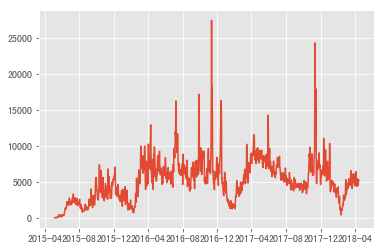

In [47]:
fig, ax = plt.subplots()
ax.plot(data['new_DateId'], data['Quantity'])

### 使用matplotlib畫出 星期幾 v.s 銷售量 的 bar chart。

In [48]:
import datetime
data['weekday'] = data['new_DateId'].dt.weekday
data.head()

,new_DateId,Quantity,weekday
0,2015-05-06,26,2
1,2015-05-07,38,3
2,2015-05-08,61,4
3,2015-05-09,87,5
4,2015-05-10,103,6


In [53]:
data_weekday = data.groupby(by='weekday')['Quantity'].sum().to_frame()
data_weekday.reset_index(level=0, inplace=False)
data_weekday

,Quantity
weekday,
0,750079
1,827454
2,836489
3,773765
4,743191
5,817931
6,859920


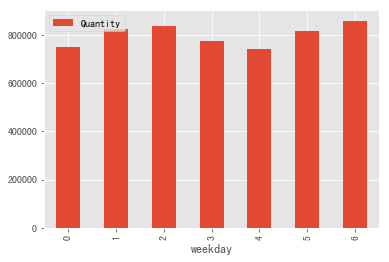

In [57]:
data_weekday.plot.bar()